IMPORTING THE DATA FROM KAGGLE

In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 138MB/s]


In [ ]:
!unzip emotions-dataset-for-nlp.zip

Archive:  emotions-dataset-for-nlp.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 


### **IMPORTING** IMPOTANT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
modell= LogisticRegression()

from sklearn.metrics import confusion_matrix

from sklearn import tree
modeld=tree.DecisionTreeClassifier()

from sklearn.svm import SVC
models=SVC()

from sklearn.ensemble import RandomForestClassifier
modelr=RandomForestClassifier()

from sklearn.model_selection import cross_val_score

from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB
modelg=GaussianNB()

from sklearn.naive_bayes import MultinomialNB
modelm=MultinomialNB()

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
df=pd.read_csv("/content/train.txt", delimiter=';', header=None, names=['sentence','label'])
df.head()

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df.shape

(16000, 2)

In [ ]:
df.label.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label, dtype: int64

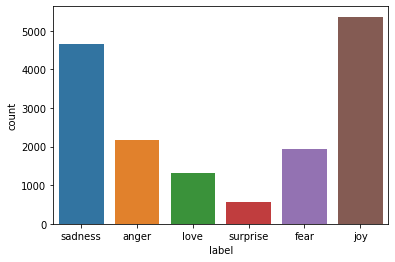

In [ ]:
sns.countplot(x='label', data=df)

In [ ]:
df.isnull().sum()

sentence    0
label       0
dtype: int64

In [ ]:
len(df)

16000

### **STEMMING**

In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(df)):
  result=re.sub('[^a-zA-Z]',' ', df['sentence'][i])
  result=result.lower()
  result=result.split()

  result=[ps.stem(word) for word in result if word not in stopwords.words('english')]
  result=' '.join(result)
  corpus.append(result)

## ONE HOT REPRESENTATION

In [ ]:
voc_size=5000
from tensorflow.keras.preprocessing.text import one_hot
one_hot_rep=[one_hot(words,voc_size)for words in corpus]
one_hot_rep

In [ ]:
z=df['sentence'].str.split().str.len()
z.max()

66

## PADDING THE ONE HOT REPRESENTATION

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
embedded_docs=pad_sequences(one_hot_rep,padding='pre',maxlen=z.max())
embedded_docs

array([[   0,    0,    0, ...,  866,  830, 4759],
       [   0,    0,    0, ..., 3990, 1135, 4871],
       [   0,    0,    0, ...,  830, 4719, 3719],
       ...,
       [   0,    0,    0, ..., 3300, 3154, 2636],
       [   0,    0,    0, ..., 2089, 2491, 2704],
       [   0,    0,    0, ...,  830, 3704, 1873]], dtype=int32)

### **Importing required libraries for lstm model**

In [ ]:

import tensorflow as tf
from tensorflow import keras
import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM

In [ ]:
df.label.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

## CONVERTING CATEGORICAL DATA 

In [ ]:
df.replace(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],[0,1,2,3,4,5],inplace=True)
df.head()

,sentence,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1


In [ ]:
y=df.label

In [ ]:
x=np.array(embedded_docs)

### **SPLITTING DATA TO TRAIN AND TEST**

In [ ]:
x_train ,x_test, y_train ,y_test =train_test_split(x,y ,test_size=0.3)

### **BUILDING A NEURAL NETWORK WITH FEW LAYER**

In [ ]:
embedding_vector_feature=50
model_lstm=Sequential()
model_lstm.add(Embedding(voc_size,embedding_vector_feature,input_length=z.max() )) ##EMBEDDING LAYER
model_lstm.add(Bidirectional(LSTM(100)))  ##Bidirectinal LSTM layer
model_lstm.add(Dense(25,activation='relu'))  ## Intermedidiate dense layer
model_lstm.add(Dense(6,activation='softmax')) ## FINAL DENSE LAYER


In [ ]:
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(model_lstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 50)            250000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              120800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 25)                5025      
                                                                 
 dense_1 (Dense)             (None, 6)                 156       
                                                                 
Total params: 375,981
Trainable params: 375,981
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_lstm.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
175/175 [==============================] - 30s 150ms/step - loss: 1.5384 - accuracy: 0.3442 - val_loss: 1.3598 - val_accuracy: 0.4600
Epoch 2/100
175/175 [==============================] - 23s 133ms/step - loss: 0.9634 - accuracy: 0.6412 - val_loss: 0.7602 - val_accuracy: 0.7281
Epoch 3/100
175/175 [==============================] - 24s 135ms/step - loss: 0.5116 - accuracy: 0.8197 - val_loss: 0.5717 - val_accuracy: 0.8087
Epoch 4/100
175/175 [==============================] - 24s 136ms/step - loss: 0.3192 - accuracy: 0.8924 - val_loss: 0.5560 - val_accuracy: 0.8229
Epoch 5/100
175/175 [==============================] - 23s 130ms/step - loss: 0.2304 - accuracy: 0.9221 - val_loss: 0.6277 - val_accuracy: 0.8202
Epoch 6/100
175/175 [==============================] - 23s 132ms/step - loss: 0.1760 - accuracy: 0.9388 - val_loss: 0.5940 - val_accuracy: 0.8225
Epoch 7/100
175/175 [==============================] - 23s 134ms/step - loss: 0.1481 - accuracy: 0.9503 - val_loss: 0.6260 -

In [ ]:
y_pred=model_lstm.predict(x_test)
y_pred


array([[1.3064305e-06, 1.7486733e-05, 2.5759414e-07, 3.5428721e-07,
        9.9997818e-01, 2.3653424e-06],
       [9.8775196e-01, 1.9939669e-04, 8.1012557e-09, 5.6659095e-09,
        1.2046601e-02, 2.0666398e-06],
       [1.0000000e+00, 6.1327965e-10, 2.0723558e-10, 1.9794802e-12,
        9.6322048e-11, 3.3208341e-08],
       ...,
       [3.2414504e-05, 3.9429299e-08, 1.0537905e-04, 5.8322456e-07,
        5.4664948e-08, 9.9986160e-01],
       [2.1039383e-04, 3.7364551e-08, 2.2060275e-01, 7.7508819e-01,
        1.3843483e-03, 2.7143529e-03],
       [2.7935264e-06, 9.9999642e-01, 7.4892682e-07, 7.9700819e-16,
        8.2956888e-08, 1.5766032e-08]], dtype=float32)

In [ ]:
y_p=[np.argmax(element) for element in y_pred]

In [ ]:
y_p[0:5]

[4, 0, 0, 0, 5]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1390
           1       0.83      0.83      0.83       640
           2       0.62      0.59      0.60       401
           3       0.62      0.63      0.63       167
           4       0.80      0.79      0.79       570
           5       0.85      0.85      0.85      1632

    accuracy                           0.82      4800
   macro avg       0.76      0.76      0.76      4800
weighted avg       0.82      0.82      0.82      4800



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_p)

0.8220833333333334

## ACCURACY IS 82% and precision recall and f1-score are good 

In [ ]:
def input_word(s):
  voc_size=5000
  o=[one_hot(words,voc_size)for words in s]
  e=pad_sequences(o,padding='pre',maxlen=z.max())
  e=np.array(e)
  return e


In [ ]:
k=input_word(f)
k

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 4608,  868, 4887, 3944, 3296, 1887,  668,   92,  868]],
      dtype=int32)

In [ ]:
np.argmax(model_lstm.predict(k))

5

In [ ]:
f=['this is very dangerous ']
k=input_word(f)
np.argmax(model_lstm.predict(k))

1

In [ ]:
def predict_emotion(r):
  emotion=['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']
  return emotion[np.argmax(model_lstm.predict(input_word(r)))]

In [ ]:
predict_emotion(['Trends on SGX Nifty indicate a positive opening'])

'joy'